# 클로젯셰어 수행 과제
## Main Theme : 신규 구매 전반 분석 및 결과 도식화

- 분석 자료 : 최근 3개월간 신규 구매 데이터 일부

- 분석 필요 내용

  1. 구매 소요 시간 분석  
     1-1. 가입일로부터 구매일까지 전환된 소요시간 분석  
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석  
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석  
            ex. 가입 1일 이내 전환 유저 : 10% -> 15% 상승 성과  
  2. 구매 상품 트렌드 분석  
     2-1. 유저당 주문 수량 분석  
         ㄴ 최근 3개월 전체 분석 / 각 월 별 분석  
         ㄴ 분기 경향 / 월 별 변동사항 확인 -> 트렌드 분석  
  
     2-2. 주문 아이템 분석  
         ㄴ 브랜드 별 선호도, 아이템 카테고리별 선호도 분석  
         ㄴ 신규 유저들의 구매 트렌드 파악  
3. 분석 내용 토대로 인사이트 도출  
     3-1. 분석 내용 도식화  
         ㄴ 1~2의 분석 내용 종합 및 도식화 (표 또는 그래프)  
         ㄴ 유사성을 갖는 결과에 대하여 그룹화  
     3-2. 인사이트 도출  
         ㄴ 해당 결과를 통해 나타나는 사항 정리  
         ㄴ 인사이트 도출 혹은 새로운 제안사항 전달 (없을 시 진행하지 않아도 무방)  
  
- 분석 참고 사항  
  
  1. 용어 및 칼럼 설명  
     brandnm : 아이템 브랜드명  
     goodsnm : 아이템 명  
     USER : 개별 유저 식별 값  
     reg_date : 개별 유저 가입일  
     order_date : 아이템 주문일  
     p_type : 주문 상품 종류  
             7days (7일권) / 4days (4일권)  
     sub_type : 주문 상품 카테고리   
               BA – 가방 / O – 아우터 / D – 드레스 / T – 상의 / B – 하의 / TB – 투피스   
     app_yn : 어플리케이션 사용 여부  
              Y – 어플리케이션 사용 / (공백) – 어플리케이션 미사용  


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

#한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정 / 개인 자유
plt.style.use("ggplot")

## 데이터 불러오기

In [4]:
df_raw = pd.read_csv('클로젯셰어_과제DB 대체 자료.csv', encoding='cp949')
df_raw

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,NaN
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,NaN
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,NaN
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


In [5]:
df_raw_copy = df_raw

In [6]:
df_raw_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Data columns (total 8 columns):
brandnm       1442 non-null object
goodsnm       1471 non-null object
USER          1471 non-null object
reg_date      1466 non-null object
order_date    1471 non-null object
p_type        1471 non-null object
sub_type      1471 non-null object
app_yn        1295 non-null object
dtypes: object(8)
memory usage: 92.1+ KB


In [7]:
df_raw_copy.describe()

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
count,1442,1471,1471,1466,1471,1471,1471,1295
unique,245,979,1234,368,90,2,6,1
top,Gucci,chevron quilted cross bag black,a1149461,2021-03-16,2021-03-24,4days,BA,Y
freq,232,23,11,44,47,894,692,1295


In [8]:
df_raw_copy.isnull().sum()

brandnm        29
goodsnm         0
USER            0
reg_date        5
order_date      0
p_type          0
sub_type        0
app_yn        176
dtype: int64

**결측치가 브랜드명과 앱사용여부에 존재함**  
앱사용여부는 결측치는 N이므로 결측치 대체 가능  
브랜드명과 가입일 결측치는 어떻게 처리할껀지?  

In [9]:
# 앱사용여부 결측치 'N' 대체
df_raw_copy['app_yn'] = df_raw_copy['app_yn'].fillna('N')
df_raw_copy

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


In [10]:
df_raw_copy.loc[df_raw_copy['brandnm'].isnull() == True]

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
146,NaN,feminine military blouse & high waist wide slacks,a1144948,2021-01-30,2021-01-30,4days,TP,Y
147,NaN,button basic pattern doublebreasted-jacket sky...,a170041,2020-01-01,2021-01-30,4days,TP,Y
160,NaN,lace point shirring blouse pink & lace detail ...,a1141009,2021-01-04,2021-01-28,4days,TP,Y
220,NaN,printing pattern hoodie grey & pocket basic pa...,a1144470,2021-01-25,2021-01-26,4days,TP,Y
267,NaN,button basic pattern jacket black & pocket bas...,a121913,2019-05-05,2021-01-21,4days,TP,Y
282,NaN,buckle shirt & embroidery lace skirt charcoal,a1132297,2020-11-22,2021-01-21,7days,TP,Y
285,NaN,button tweed pattern doublebreasted-coat multi...,a1127979,2020-10-31,2021-01-21,7days,TP,Y
329,NaN,long sleeve rib t-shirt & check pattern square...,a1134915,2020-12-03,2021-01-19,7days,TP,N
342,NaN,cutout neck knit & color pleats belt skirt,a1141257,2021-01-05,2021-01-19,4days,TP,Y
368,NaN,El estilo de Claire - neoprene botanical print...,a1107090,2020-07-03,2021-01-17,4days,TP,Y


In [11]:
df_raw_copy.loc[df_raw_copy['reg_date'].isnull() == True]

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
265,Gucci,mamont chain bag red,a1144008,NaN,2021-01-21,7days,BA,Y
351,Lanvin,banding point jumper skyblue,a1142855,NaN,2021-01-18,7days,O,N
564,Gucci,leather point cross bag,a1146490,NaN,2021-02-18,4days,BA,Y
746,Fendi,monogram zucchino shoulder bag,a1145478,NaN,2021-02-04,4days,BA,N
1254,Fendi,back to school bag 1,a1149094,NaN,2021-03-12,7days,BA,Y


In [12]:
# 브랜드명(brandnm) 29개의 결측치와 가입일(reg_date) 5개 결측치 제거
df_raw_copy = df_raw_copy.dropna()
df_raw_copy

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y
...,...,...,...,...,...,...,...,...
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y
1467,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y
1468,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y
1469,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y


### 최근구입일 - 가입일 기간 새로운 변수 생성

In [13]:
# 가입일과 구매일을 datetime으로..
df_raw_copy['reg_date'] = pd.to_datetime(df_raw_copy['reg_date'])
df_raw_copy['order_date'] = pd.to_datetime(df_raw_copy['order_date'])

df_raw_copy['order_month'] = df_raw_copy['order_date'].dt.strftime('%m')
df_raw_copy['period'] = df_raw_copy['order_date']-df_raw_copy['reg_date']

In [14]:
df_raw_copy.describe()

,period
count,1437
mean,106 days 15:14:54.363256
std,206 days 17:46:09.597776
min,0 days 00:00:00
25%,1 days 00:00:00
50%,4 days 00:00:00
75%,88 days 00:00:00
max,1304 days 00:00:00


In [15]:
len(df_raw_copy['USER'].unique())

1209

>**전체 유저 수는 1209명**

In [16]:
# 전체 데이터의 브랜드명 개수

print(len(df_raw_copy['brandnm'].unique()))
df_raw_copy['brandnm'].unique()

244


array(['Gucci', 'El estilo de Claire', 'Danha', 'Burberry London',
       'Prada', 'Max Mara', 'Molliolli', 'Sandro', 'Louis Vuitton',
       'Tory Burch', 'Chloe', 'Time', 'The Izzat', 'Mojosphine',
       'Ted Baker', '& Other Stories', 'Fendi', 'Balmain', 'Celine',
       'Burberry', 'Chanel', 'Dior', 'Bottega Veneta', 'Plastic Island',
       'Reneevon', 'Sorry Too Much Love', 'Saint Laurent', 'Miu Miu',
       'Yves Saint Laurent', 'Zooc', 'Vivienne Westwood',
       'Maison Kitsune', 'Margarin fingers', 'The Tint', 'Love Moschino',
       'Michaa', 'Vivienne Westwood Red Label', 'MSGM', 'Christian Dior',
       'It michaa', 'SJSJ', 'Amsale', 'Imvely', 'Chi Chi London', 'Maje',
       'Biker Starlet', 'Thom Browne', 'Jill By Jill Stuart',
       'Comme des Garcons', 'Nain', 'Dolce & Gabbana', 'Givenchy',
       'Salvatore Ferragamo', 'Andersen-Andersen', 'A.P.C.',
       'Self-portrait', 'Sonia Rykiel', 'Diane von Furstenberg',
       'Hugo Boss', 'Baum Und Pferdgarten', 'BCBG', '

>**등록되어 있는 브랜드 수 244개**

In [17]:
# 전체 데이터의 브랜드 top10
df_raw_copy['brandnm'].value_counts().head(10)

Gucci                 230
Chanel                 90
Saint Laurent          86
Louis Vuitton          79
Prada                  58
Burberry               53
Yves Saint Laurent     38
Thom Browne            33
Celine                 28
Fendi                  27
Name: brandnm, dtype: int64

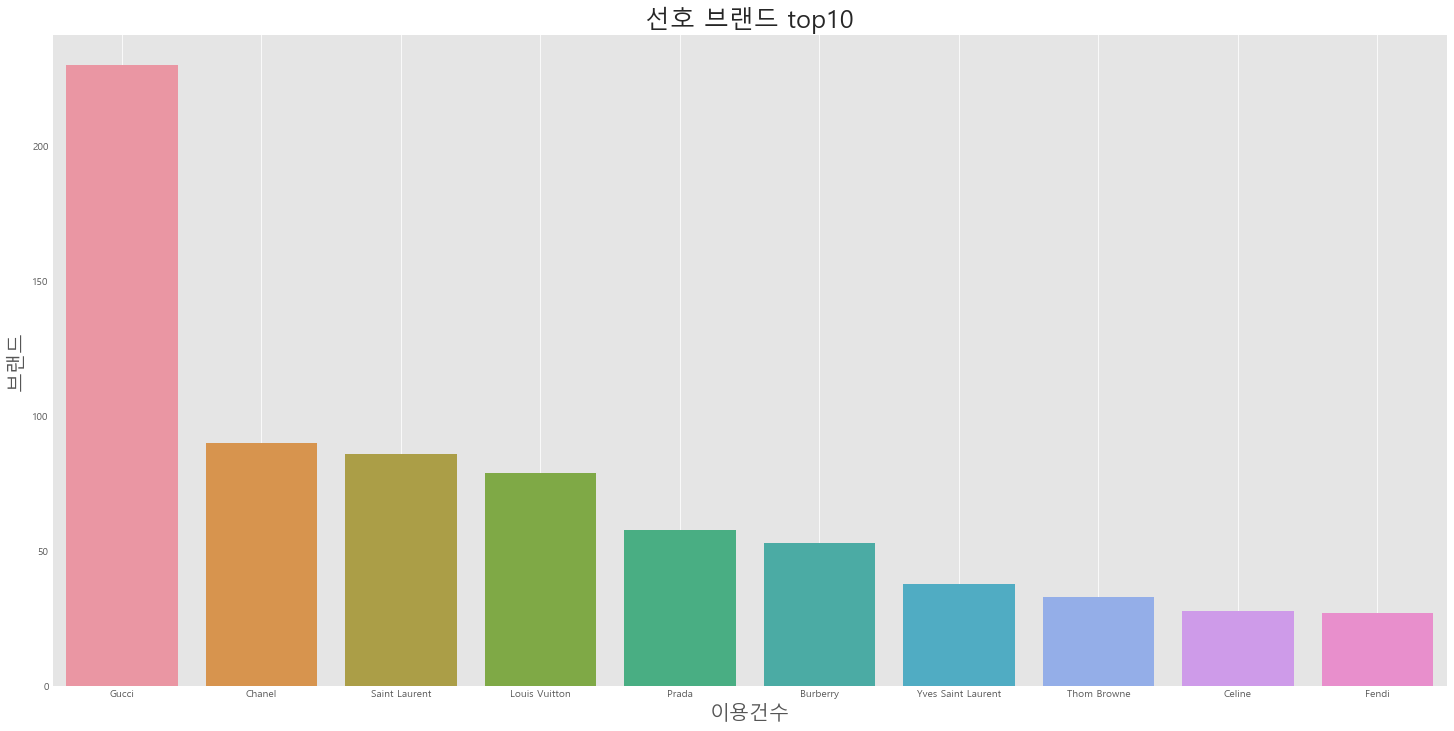

In [18]:
# # 전체 데이터의 브랜드 top10

plt.figure(figsize=(25,12))
color = sns.set_palette("Pastel2")
sns.barplot(x=df_raw_copy['brandnm'].value_counts().head(10).index, y=df_raw_copy['brandnm'].value_counts().head(10), data=df_raw_copy, palette=color)
plt.grid()
plt.title('선호 브랜드 top10', fontsize=25)
plt.ylabel('브랜드', fontsize=20)
plt.xlabel('이용건수', fontsize=20)
plt.show()

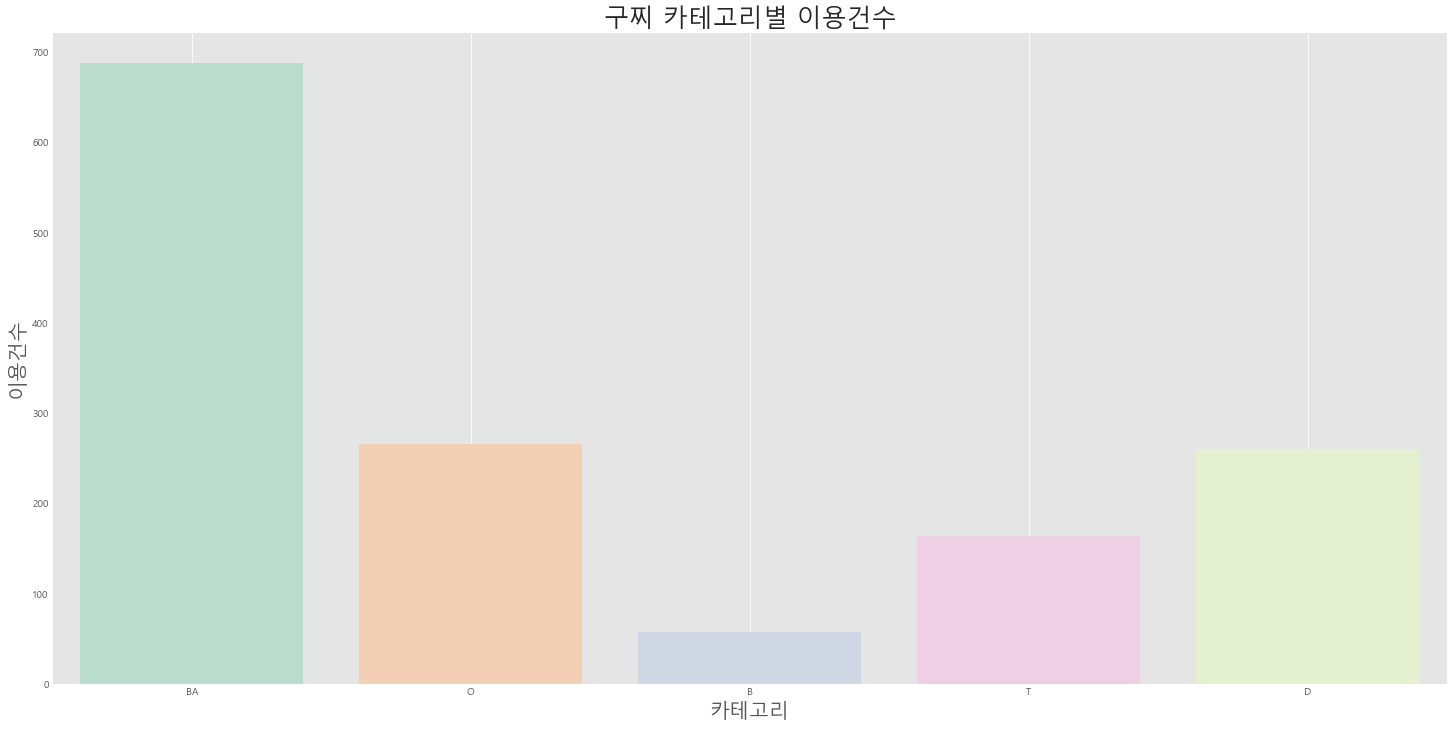

In [19]:
## 브랜드 구찌에서 많이 이용되는 카테고리?

plt.figure(figsize=(25,12))
color = sns.set_palette("Pastel2")
sns.countplot(x = df_raw_copy['sub_type'], data = df_raw_copy.loc[df_raw_copy['brandnm'] =='Gucci'], palette=color)
plt.grid()
plt.title('구찌 카테고리별 이용건수', fontsize=25)
plt.ylabel('이용건수', fontsize=20)
plt.xlabel('카테고리', fontsize=20)
plt.show()

In [20]:
# 전체 데이터의 카테고리별 선호도
df_raw_copy['sub_type'].value_counts().head(10)

BA    688
O     266
D     261
T     164
B      58
Name: sub_type, dtype: int64

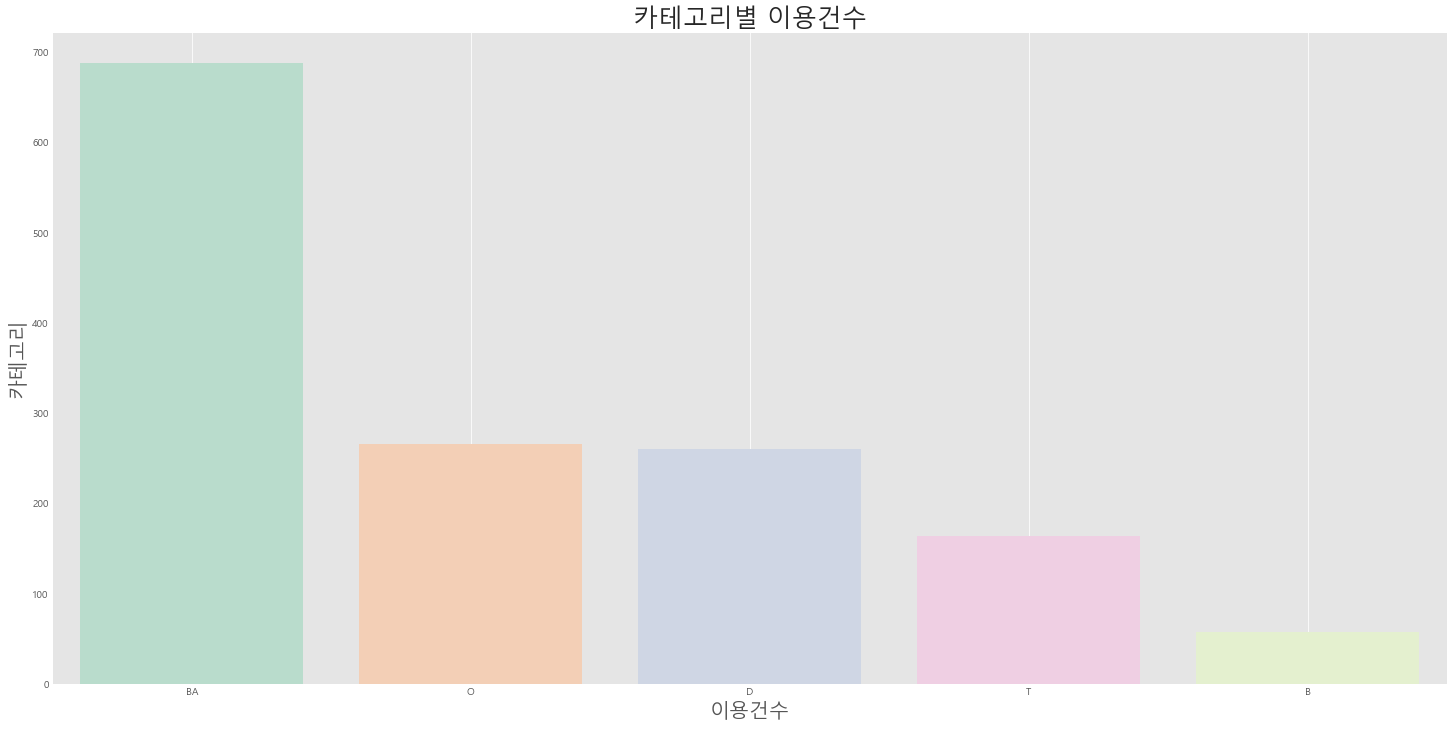

In [21]:
# # 전체 데이터의 브랜드 top10

plt.figure(figsize=(25,12))
color = sns.set_palette("Pastel2")
sns.barplot(x=df_raw_copy['sub_type'].value_counts().head(10).index, y=df_raw_copy['sub_type'].value_counts().head(10), data=df_raw_copy, palette=color)
plt.grid()
plt.title('카테고리별 이용건수', fontsize=25)
plt.ylabel('카테고리', fontsize=20)
plt.xlabel('이용건수', fontsize=20)
plt.show()

In [22]:
# 전체 데이터의 카테고리별 선호도
df_raw_copy['goodsnm'].value_counts().head(11)

chevron quilted cross bag black    23
classic clutch black               12
boy chanel clutch black            11
padlock GG canvas shoulder bag      9
dionysus shoulder bag beige         8
mini sunset chain bag black         8
epi tote bag black                  8
dionysus cross bag beige            7
quilted shoulder bag black          7
flap cross bag black                7
monogram clutch brown               7
Name: goodsnm, dtype: int64

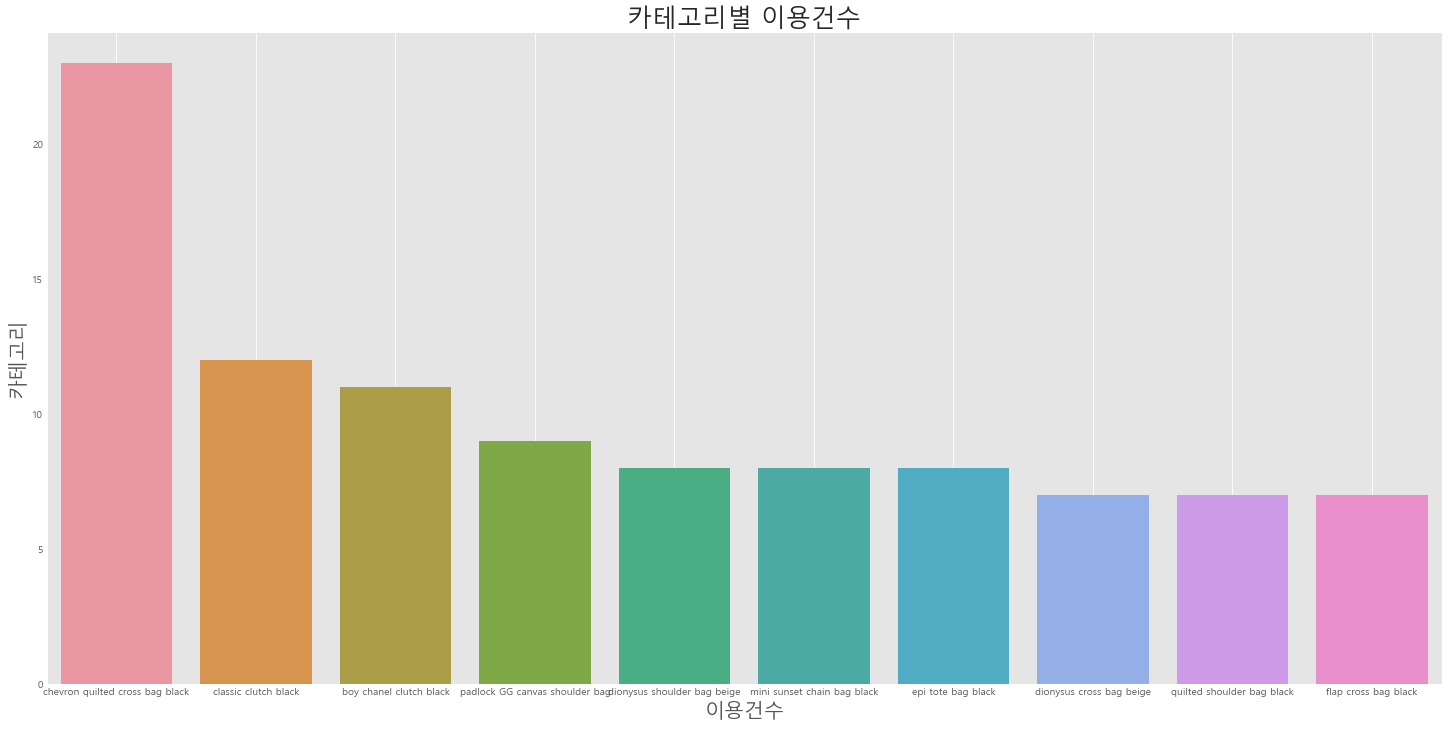

In [23]:
# # 전체 데이터의 브랜드 top10

plt.figure(figsize=(25,12))
color = sns.set_palette("Pastel2")
sns.barplot(x=df_raw_copy['goodsnm'].value_counts().head(10).index, y=df_raw_copy['goodsnm'].value_counts().head(10), data=df_raw_copy, palette=color)
plt.grid()
plt.title('카테고리별 이용건수', fontsize=25)
plt.ylabel('카테고리', fontsize=20)
plt.xlabel('이용건수', fontsize=20)
plt.show()

In [24]:
df_raw_copy.loc[df_raw_copy['goodsnm']=='chevron quilted cross bag black']

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,order_month,period
45,Saint Laurent,chevron quilted cross bag black,a1140871,2021-01-02,2021-01-13,4days,BA,Y,01,11 days
51,Saint Laurent,chevron quilted cross bag black,a1141925,2021-01-09,2021-01-12,4days,BA,Y,01,3 days
151,Saint Laurent,chevron quilted cross bag black,a1144784,2021-01-28,2021-01-29,7days,BA,Y,01,1 days
194,Saint Laurent,chevron quilted cross bag black,a1144656,2021-01-27,2021-01-27,7days,BA,Y,01,0 days
327,Saint Laurent,chevron quilted cross bag black,a146902,2019-10-13,2021-01-20,4days,BA,Y,01,465 days
339,Saint Laurent,chevron quilted cross bag black,a1136719,2020-12-12,2021-01-19,4days,BA,Y,01,38 days
366,Saint Laurent,chevron quilted cross bag black,a1142742,2021-01-13,2021-01-18,7days,BA,Y,01,5 days
396,Saint Laurent,chevron quilted cross bag black,a1147498,2021-02-25,2021-02-26,4days,BA,Y,02,1 days
423,Saint Laurent,chevron quilted cross bag black,a1147518,2021-02-25,2021-02-25,4days,BA,Y,02,0 days
488,Saint Laurent,chevron quilted cross bag black,a1147032,2021-02-21,2021-02-23,4days,BA,Y,02,2 days


**가장 이용건수가 많았던 아이템의 브랜드는 Saint Laurent**

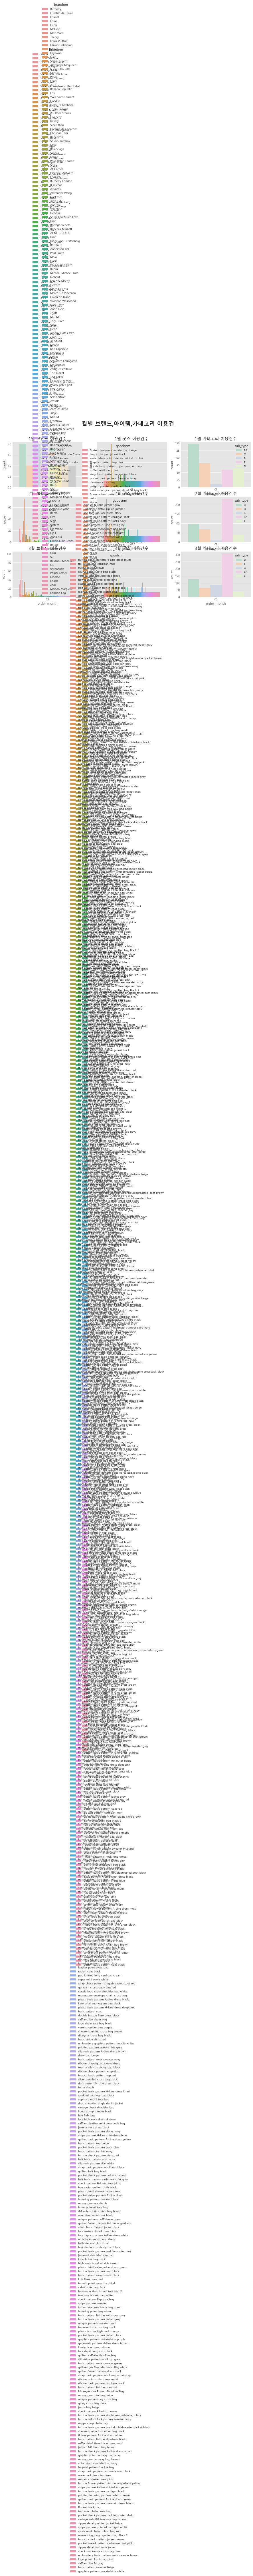

In [28]:
f, ax  = plt.subplots(3,3,figsize=(15,10))
plt.subplot(331)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '01'].head(10), x='order_month', hue='brandnm')
plt.title('1월 브랜드 이용건수')

plt.subplot(332)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '01'], x='order_month', hue='goodsnm')
plt.title('1월 굿즈 이용건수')

plt.subplot(333)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '01'], x='order_month', hue='sub_type')
plt.title('1월 카테고리 이용건수')

plt.subplot(334)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '02'], x='order_month', hue='brandnm')
plt.title('2월 브랜드 이용건수')

plt.subplot(335)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '02'], x='order_month', hue='goodsnm')
plt.title('2월 굿즈 이용건수')

plt.subplot(336)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '02'], x='order_month', hue='sub_type')
plt.title('2월 카테고리 이용건수')

plt.subplot(337)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '03'], x='order_month', hue='brandnm')
plt.title('3월 브랜드 이용건수')

plt.subplot(338)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '03'], x='order_month', hue='goodsnm')
plt.title('3월 굿즈 이용건수')

plt.subplot(339)
sns.countplot(data=df_raw_copy.loc[df_raw_copy['order_month']== '03'], x='order_month', hue='sub_type')
plt.title('3월 카테고리 이용건수')

plt.suptitle('월별 브랜드,아이템,카테고리 이용건',fontsize=20, fontweight = 'bold')
plt.tight_layout()
plt.show()

**=====================================================**

## 팀_baseline으로 세부분석

In [27]:
df_team = pd.read_csv('팀_basline_csv.csv')
df_team

,Unnamed: 0,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


In [59]:
df_raw_copy['day'] = df_raw_copy['order_date'].dt.weekday # 0(월) ~ 6(일)

In [60]:
# 요일별 상품별 결제건수

df_raw_copy_d_p = df_raw_copy.groupby(['day','p_type'])['USER'].count().reset_index()
df_raw_copy_d_p = df_raw_copy_d_p[['day','p_type','USER']]
df_raw_copy_d_p.columns = ['요일','상품','이용수']
df_raw_copy_d_p

,요일,상품,이용수
0,0,4days,126
1,0,7days,77
2,1,4days,178
3,1,7days,113
4,2,4days,236
5,2,7days,96
6,3,4days,170
7,3,7days,115
8,4,4days,117
9,4,7days,78


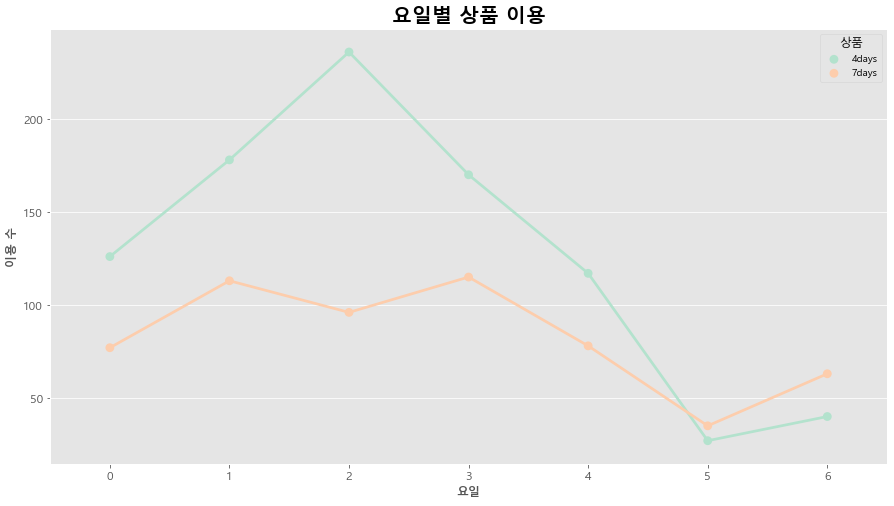

In [61]:
fig, ax = plt.subplots(1,1, figsize = (15,8))
sns.pointplot(x = '요일', y = '이용수', hue = '상품', data = df_raw_copy_d_p, palette = color)
plt.title('요일별 상품 이용', fontsize = 20, fontweight = 'bold')
plt.xlabel('요일', fontsize = 12, fontweight = 'bold')
plt.ylabel('이용 수', fontsize = 12, fontweight = 'bold')
plt.tick_params(axis = 'x', labelsize = 12)
plt.tick_params(axis = 'y', labelsize = 12)
fig.show()

**4일권/7일권 모두 토요일에 감소**  
가방 쉐어가 많은 것을 봤을 때, 결혼식이나 주말에 있을 행사때문에 사용하려나?  
하고 생각했었는데, 결제요일이 실제로 결제한 날인지.. 사용한 날인지.. 또 생각하게 됨  

**=============================================================**

**기타사항**  
후기 : https://m.blog.naver.com/CommentList.nhn?blogId=greanb&logNo=221827174188  
(구글에 클로제셰어 검색하면 단점이 상단에 뜸..)  
최근 댓글 읽어보았는데, 수수료도 크고 CS 대응도 좋지 않은듯 함 상품관리도 소홀  
당장에 이익내는것도 중요하지만 사람들을 많이 끌어모으고 이탈하지 않는 방법 고민 필요  

---------------------------
* 쉐어러들은 왜 자신의 물건을 쉐어할까?  
* 이용자들은 왜 상품을 구매하지 않고 빌려서 사용할까?  
  - 다양한 브랜드 사용해보고 싶어서?  
  - 구매 전 시착용?  

In [51]:
# # 가입하고 당일에 구입한 유저 수
# df_raw_copy_0user = df_raw_copy.loc[df_raw_copy['period']=='0 days']
# df_raw_copy_0user

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,order_month,period
15,Prada,logo hobo bag black,a1143143,2021-01-15,2021-01-15,4days,BA,Y,01,0 days
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,01,0 days
17,Time,pocket basic pattern coat black,a1142921,2021-01-14,2021-01-14,4days,O,Y,01,0 days
22,& Other Stories,basic pattern sweater ivory,a1143019,2021-01-14,2021-01-14,4days,T,N,01,0 days
30,Prada,quilted cross body bag black,a1142924,2021-01-14,2021-01-14,4days,BA,Y,01,0 days
...,...,...,...,...,...,...,...,...,...,...
1458,Chanel,boy chanel clutch black,a1147960,2021-03-01,2021-03-01,7days,BA,Y,03,0 days
1461,Chanel,pocket tweed pattern cashmere coat pink,a1147959,2021-03-01,2021-03-01,7days,O,N,03,0 days
1463,Burberry,check mackenzie cross bag pink,a1147938,2021-03-01,2021-03-01,7days,BA,Y,03,0 days
1464,Burberry London,embroidery basic pattern wool sweater brown,a1147932,2021-03-01,2021-03-01,4days,T,Y,03,0 days


In [50]:
# len(df_raw_copy_0user['USER'].unique()) # 당일 가입 구매 유저

320

### 가입 당일 앱 사용한 유저들의 경향

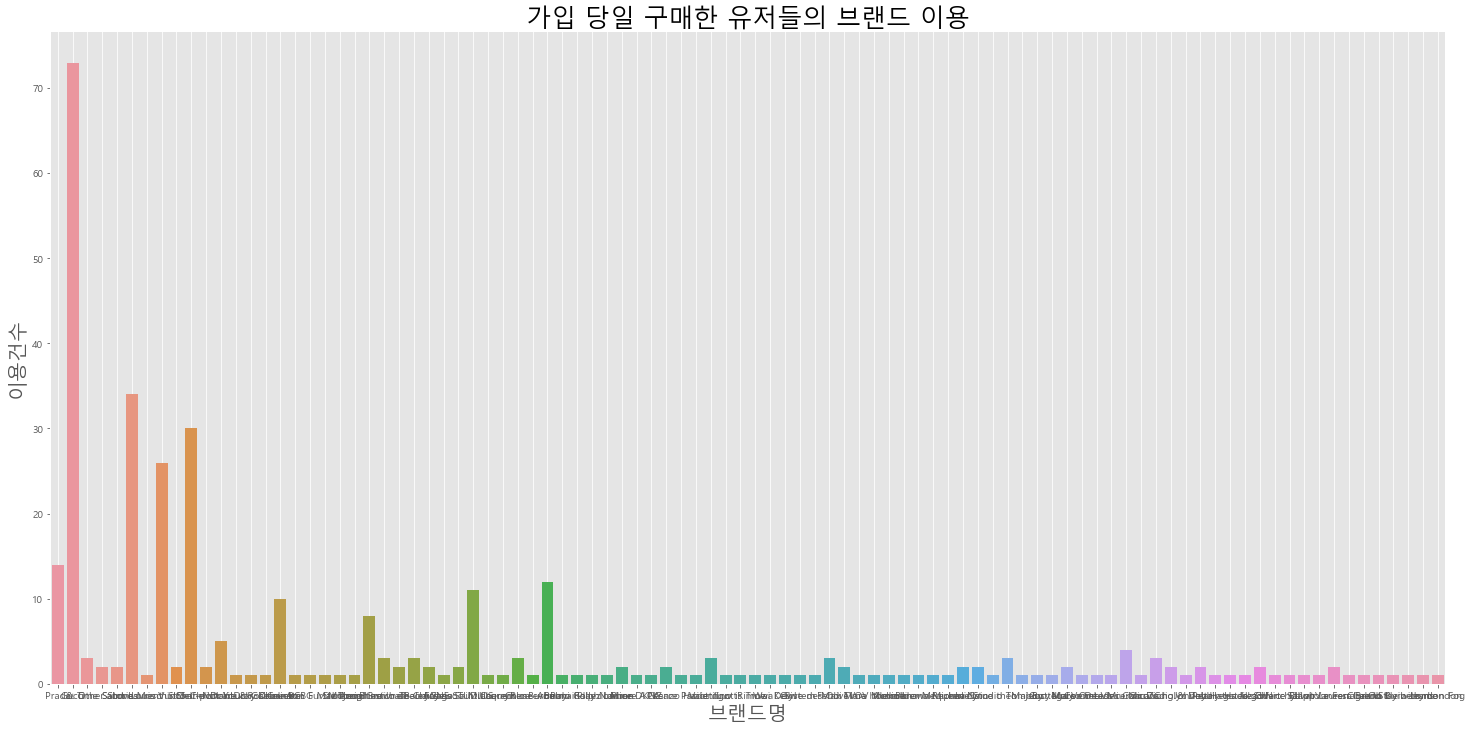

In [52]:
# # 어떤 브랜드 이용?

# df_raw_copy_0user

# plt.figure(figsize=(25,12))
# color = sns.set_palette("Pastel2")
# sns.countplot(df_raw_copy_0user['brandnm'], palette=color)
# plt.grid()
# plt.title('가입 당일 구매한 유저들의 브랜드 이용', fontsize=25)
# plt.ylabel('이용건수', fontsize=20)
# plt.xlabel('브랜드명', fontsize=20)
# plt.show()

#### 그럼 가입기간이 가장 긴 유저와 당일 가입한 유저들의 구매 브랜드와 구매상품 차이 확인

In [48]:
# df_raw_copy_75peruser = df_raw_copy.loc[df_raw_copy['period']>='88 days']
# df_raw_copy_75peruser

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,order_month,period
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,01,406 days
5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,01,820 days
7,Molliolli,pocket basic pattern fur-outer ivory,a115159,2019-01-29,2021-01-15,4days,O,Y,01,717 days
9,Sandro,pattern pointed cardigan black,a117306,2019-03-02,2021-01-15,7days,O,Y,01,685 days
27,Fendi,two way bucket bag white,a192991,2020-04-02,2021-01-14,7days,BA,Y,01,287 days
...,...,...,...,...,...,...,...,...,...,...
1454,Burberry,button basic pattern wool cardigan grey,a163815,2019-12-12,2021-03-01,7days,O,Y,03,445 days
1459,Gucci,marmont gg logo quilted bag Black 2,a177034,2020-01-23,2021-03-01,4days,BA,Y,03,403 days
1462,Max Mara,zipper detail two tone jacket,a112319,2018-11-29,2021-03-01,4days,O,Y,03,823 days
1466,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,03,691 days


In [56]:
# print(len(df_raw_copy_75peruser['USER'].unique()))  # 가입일이 오래된 유저(사분위수 75% 이상)

303


In [58]:
# # 가입일이 오래된 유저의 브랜드 선호도 top10

# df_raw_copy_75peruser['brandnm'].value_counts().head(10)

Gucci                 37
Chanel                19
Burberry              19
Prada                 16
Louis Vuitton         13
Saint Laurent         13
Yves Saint Laurent    11
Thom Browne           11
Max Mara               9
Fendi                  8
Name: brandnm, dtype: int64

In [57]:
# # 당일 가입 구매 유저의 브랜드 선호도 top10

# df_raw_copy_0user['brandnm'].value_counts().head(10)

Gucci                 73
Saint Laurent         34
Chanel                30
Louis Vuitton         26
Prada                 14
Burberry              12
Yves Saint Laurent    11
Celine                10
Thom Browne            8
Christian Dior         5
Name: brandnm, dtype: int64

#### 전체 유저의 브랜드 선호도와 큰 차이는 없는 듯

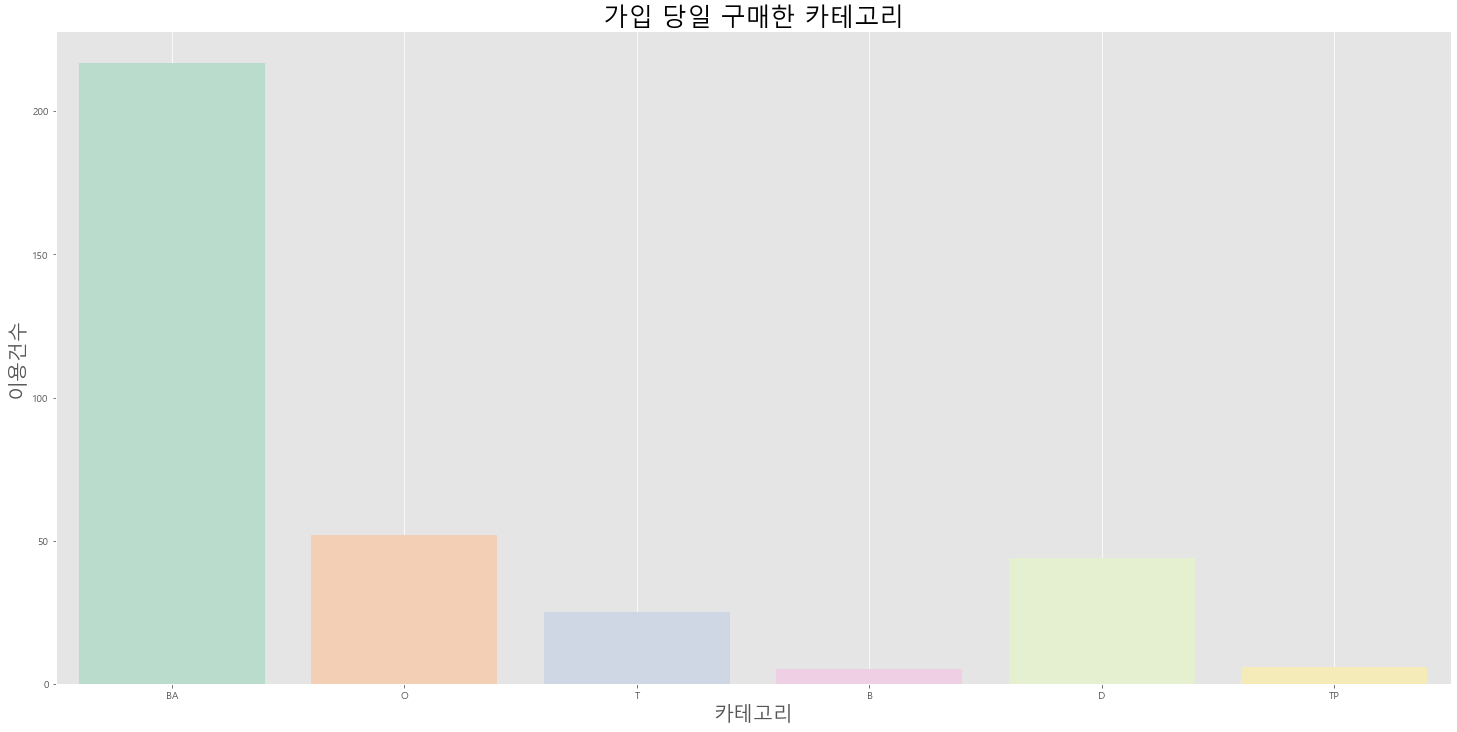

In [41]:
# # 이용 카테고리?
# df_raw_copy_0user

# plt.figure(figsize=(25,12))
# color = sns.set_palette("Pastel2")
# sns.countplot(df_raw_copy_0user['sub_type'], palette=color)
# plt.grid()
# plt.title('가입 당일 구매한 카테고리', fontsize=25)
# plt.ylabel('이용건수', fontsize=20)
# plt.xlabel('카테고리', fontsize=20)
# plt.show()

**1위 가방(BA)**  
그 다음 아우터(O), 드레스(D) 순  
제일 이용건수가 적은 카테고리는 하의(B)  

### 전체 데이터의 브랜드 순위와 조금 다르다는 것을 알 수 있음

*가입일이 오래되었다는 것이 오랜만에 구입한건지 꾸준히 구입해 온건지 구매횟수를 살펴봐야 할 것 같다  
*두 그룹으로(당일구매/오래전가입구매) 나누어 앱사용여부나 구매권을 더 상세히 살펴볼 필요